 Authors: Pedro Herruzo, Xiaoxia Lin

--------------------------------------------------------------------------------------------------------------------

## Exercise 5:

Solve the two-dimensional problem

minimize $ (x - a)^2 + (x - b)^2 + xy $, 
subject to: $ 0 \leq x \leq 1; 0 \leq y \leq 1 $

for all possible values of the scalars a and b.

** Answer: ** 

We have 4 inequality constraints, we define the Lagrangian associated with
problem as:

$$
L(x,y,\mu) = ((x - a)^2 + (x - b)^2 + xy - \mu_1x - \mu_2y - \mu_3(1-x) - \mu_4(1-y) = 0
$$

According to the KKT, there exist $\mu_i$ such that:  

\begin{align*}
       \frac{\delta L}{\delta x} =  2(x-a) + 2(x-b) + y - \mu_1 + \mu_3 & = 0\\
       \frac{\delta L}{\delta y} = x - \mu_2 + \mu_4 & = 0 \\
       \mu_1 x & = 0  \\
       \mu_2 y & = 0  \\
       \mu_3 (1 - x) & = 0 \\
       \mu_4 (1 - y) & = 0 \\
       0 \leq \mu_i, &  \forall i \in \{1,2,3,4\}
\end{align*}

Solving the above system, we get several solutions, depending on a and b: 


+ 1) $x=0$ and $y = 2(a+b)+ u_1$ and $ u_2 = u_3 = u_4 =0$
    +  $ u_1 = 0: x=0$ and $y = 2(a+b)$ and $ u_1 = u_2 = u_3 = u_4 =0$
    +  $ u_1 > 0: x=0$ and $y = 0$, and $ u_2 = u_3 = u_4 =0$ and $ a = -b - \frac{u_1}{2}$
    +  $ u_1 > 0: x=0$ and $y = 1$ and $ u_2 = u_3 = u_4 =0$ and $ a =\frac{1}{2}(-2b+u_1+1)$
    
    
+ 2) $x = u_2$ and $y = 0$, and $ u_1 = u_3 = u_4 =0$ and $ a = 2 u_2 -b $
    + $x=1$ and $y = 0$ and $ u_1 = u_4 =0$ and $u_2 = 1$ and $ a =\frac{1}{2}(-2b+u_3+4)$


From the result, we can see that the minimum are on the exis $x = 0$ or $y = 0$.
+ When $x = 0$, the function always take the value $a^2 + b^2$, so $(0,y)$ is minimun $\forall y \in [0,1]$ , in this case, $ 0 \leq a^2 + b^2 \leq 1$
+ When $y = 0$, the function always take the value $(x-a)^2 + (x-b)^2$, the minimum is at $x = \frac{a+b}{2} $, where $0 \leq \frac{a+b}{2} \leq 1$, i.e. $ 0 \leq a + b \leq 2$




In [4]:
# introduce a par of numbers for a and b, below function can detect the point where the function is minimum. 

def case(a,b):
    if a**2 + b**2 <=1:
        case = "case 1"
        print "the zeros are on x=0, y=%f" %(a**2+b**2)
    else:
        if 0 <= a+b <=2:
            case = "case 2"
            print "The minimums are on y=0, x=%f" %(a+b)/2.
        else:
            case = "case 3"
            print "The minimum is on the point (x,y)=(1,0)"
    return case

case(100, 200)

The minimum is on the point (x,y)=(1,0)


'case 3'

### Plot

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, y, a, b):
    return (x - a)**2 + (x - b)**2 + x*y

2 5.0


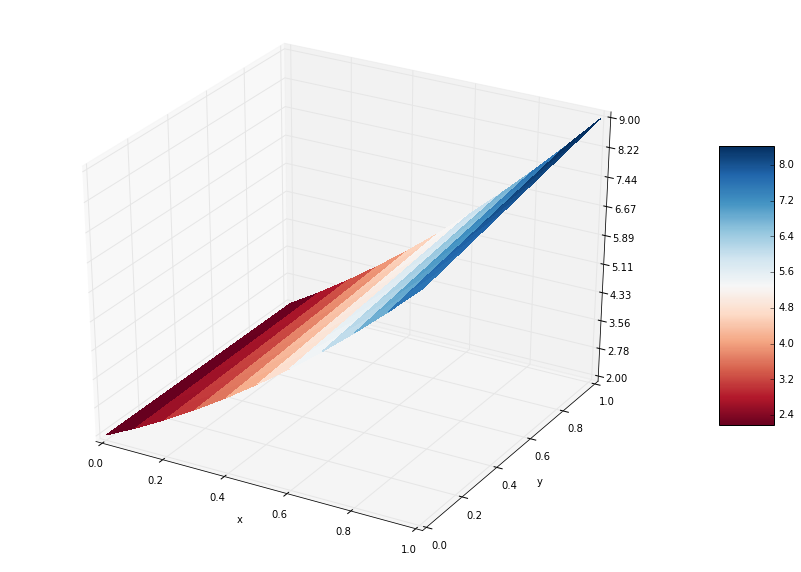

In [12]:
# Try to change the value of a and b

a = -1
b = -1

x = np.arange(0, 1.1,0.1)
y = np.arange(0, 1.1,0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a, b)


fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('x')
plt.ylabel('y')
fig.colorbar(surf, shrink=0.5, aspect=5);

print f(0,1,a,b), f(0.5,1,a,b)

## Exercise 6:

Given a vector y, consider the problem

$$ maximize~~ y^T x $$
$$ subject~~ to: ~~ x^TQx ≤ 1$$

where Q is a positive definite symmetric matrix. Show that the optimal value is $ \sqrt{y^TQ^{−1}y}$ and use this fact to establish the inequality

$$ (x^Ty)^2 ≤ (x^TQ x)(y^TQ^{−1}y)$$

** Answer: ** 

We have 1 inequality constraint, we define the Lagrangian associated with
problem as:

$$
L(x,y,\mu) = y^T x + \mu (1-x^TQx) = 0
$$

According to the KKT, there exist $\mu_i$ such that:  

\begin{align*}
       \frac{\delta L}{\delta x} = y^T -  2\mu x^T Q & = 0  ~~~~  (1) \\
       \mu (1-x^TQx) & = 0  ~~~~  (2) \\
       0 \leq & \mu
\end{align*}

From (1) and the fact that Q is a positive definite symmetric matrix,  $ \mu = \frac{1}{2} y^TQ^{-1}x^{-T} $. Substitute it into (2),  


\begin{align*}
       \frac{1}{2} y^TQ^{-1}x^{-T} (1 - x^TQx) & = 0  \\
        y^TQ^{-1}x^{-T} - y^TQ^{-1}x^{-T} x^TQx & = 0  \\
          y^T x x^T Q & = y^T  \\
           Q^{-1} & = xx^T  ~~~~  (3) \\
\end{align*}


The escalar product $ y^T x  =  x^T y$, using (3), 
$$ y^T x  =  x^T y = \sqrt{(y^T x)(x^T y)}  = \sqrt{y^T Q^{-1} y} $$


Now let us see the inequality:

+ The hyperplane $y^Tx$ under the constrain reaches its maximum value when intersecting with the quadratic function $x^TQx$, i.e. when $ x^TQx = 1$, therefore $(x^Ty)^2 \leq (x^TQx)(y^TQ^{−1}y)$.     